<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#label-dictionary" data-toc-modified-id="label-dictionary-1">label dictionary</a></span></li><li><span><a href="#make-tfrecord" data-toc-modified-id="make-tfrecord-2">make tfrecord</a></span></li><li><span><a href="#decode-check" data-toc-modified-id="decode-check-3">decode check</a></span></li></ul></div>

In [1]:
import os
import glob
import json
import random
from tqdm.notebook import tqdm
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
base_dir = os.getenv("HOME") + "/UDIGO"

In [3]:
folder_list = glob.glob(base_dir + "/dataset/train/*")
num_classes = len(folder_list)
num_classes

55

# label dictionary

In [4]:
save_dir = base_dir + "/data"
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [5]:
category_df = pd.read_csv(save_dir + "/categories.csv")
category_df.head()

,id,category,sentence
0,0,공원,"나들이 가기 좋은 공원이네요!, 공원을 산책하며 잠시 쉬어가는 건 어떨까요?"
1,1,공항,"여행의 설렘이 가득한 공항이군요!, 비행기를 타러 공항에 가볼까요?"
2,2,놀이공원,"신나고 짜릿한 놀이공원이군요!, 꿈과 희망이 가득한 놀이공원이네요!, 놀이공원에서 ..."
3,3,다리,"물 위를 가로지르는 다리군요!, 다리를 건너 새로운 곳으로 떠나볼까요?"
4,4,미술관,"멋진 예술 작품이 가득한 미술관이군요!, 미술관에서 멋진 작품을 감상해볼까요?"


In [6]:
category_dict = category_df.to_dict('index')

In [7]:
label_dict = {}
for key, value in category_dict.items():
    label_dict[value['id']] = {
        'category': value['category'],
        'sentence': list(map(lambda x: x.strip(), value['sentence'].split(',')))
    }

In [8]:
label_dict

{0: {'category': '공원',
  'sentence': ['나들이 가기 좋은 공원이네요!', '공원을 산책하며 잠시 쉬어가는 건 어떨까요?']},
 1: {'category': '공항',
  'sentence': ['여행의 설렘이 가득한 공항이군요!', '비행기를 타러 공항에 가볼까요?']},
 2: {'category': '놀이공원',
  'sentence': ['신나고 짜릿한 놀이공원이군요!',
   '꿈과 희망이 가득한 놀이공원이네요!',
   '놀이공원에서 신나는 놀이기구를 타볼까요?']},
 3: {'category': '다리',
  'sentence': ['물 위를 가로지르는 다리군요!', '다리를 건너 새로운 곳으로 떠나볼까요?']},
 4: {'category': '미술관',
  'sentence': ['멋진 예술 작품이 가득한 미술관이군요!', '미술관에서 멋진 작품을 감상해볼까요?']},
 5: {'category': '볼링장',
  'sentence': ['볼링장이에요~ 스트라이크 기원합니다!', '여럿이서 즐기기에 볼링장이 최고죠!']},
 6: {'category': '산',
  'sentence': ['산이에요~ 정상까지 고고!!', '산에서 여유를 느껴보세요.', '산에 올라 멋진 경치를 감상해보세요!']},
 7: {'category': '아이스링크',
  'sentence': ['아이스링크에서 스케이트를 타볼까요?', '아이스링크에서 즐거운 추억을 남겨보세요!']},
 8: {'category': '아쿠아리움',
  'sentence': ['예쁜 물고기가 있는 아쿠아리움이군요!', '아쿠아리움에서 바닷 속을 구경해볼까요?']},
 9: {'category': '호텔',
  'sentence': ['아늑한 호텔에서 편히 쉬어보아요!', '멀리 가지 말고 호텔에서 호캉스 어떨까요?']},
 10: {'category': '궁궐',
  'sentence': ['옛 정취를 느낄 수 있는 궁궐이군요!',
   '과거 여행하러 궁

In [9]:
with open(save_dir + f"/place_{num_classes}_label.json", "w") as json_file:
    json.dump(label_dict, json_file)

In [10]:
label_dict_re = {v['category']: k for k, v in label_dict.items()}

In [11]:
label_dict_re

{'공원': 0,
 '공항': 1,
 '놀이공원': 2,
 '다리': 3,
 '미술관': 4,
 '볼링장': 5,
 '산': 6,
 '아이스링크': 7,
 '아쿠아리움': 8,
 '호텔': 9,
 '궁궐': 10,
 '지하철역': 11,
 '놀이터': 12,
 '수영장': 13,
 '폭포': 14,
 '동물원': 15,
 '절': 16,
 '교회': 17,
 '성당': 18,
 '시장': 19,
 '쇼핑몰': 20,
 '클럽': 21,
 '박물관': 22,
 '축구장': 23,
 '야구장': 24,
 '농구장': 25,
 '공연장': 26,
 '베이커리': 27,
 '키즈카페': 28,
 '숲': 29,
 '캠핑장': 30,
 '식물원': 31,
 '해수욕장': 32,
 '수상레포츠': 33,
 '미용실': 34,
 'PC방': 35,
 '도서관': 36,
 '컨벤션센터': 37,
 '대학교': 38,
 '패스트푸드점': 39,
 '골프장': 40,
 '헬스장': 41,
 '병원': 42,
 '빨래방': 43,
 '찜질방': 44,
 '스키장': 45,
 '워터파크': 46,
 '한옥마을': 47,
 '롯데월드타워': 48,
 '남산서울타워': 49,
 '동대문디자인플라자': 50,
 '63빌딩': 51,
 '국회의사당': 52,
 '청와대': 53,
 '세빛섬': 54}

In [12]:
with open(save_dir + f"/place_{num_classes}_label_to_id.json", "w") as json_file:
    json.dump(label_dict_re, json_file)

# make tfrecord

In [13]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [14]:
def make_tfrecord(img_path, 
                  tfr_path, 
                  num_classes=num_classes, 
                  img_size=224, 
                  is_train=True):
    
    image_list = glob.glob(img_path)
    random.shuffle(image_list)
    num_images = len(image_list)
    
    writer = tf.io.TFRecordWriter(tfr_path)
    n = 0

    for img in tqdm(image_list):
        try:
            image = cv2.imread(img, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (img_size, img_size))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_to_byte = image.tobytes()

            label = img.split("/")[-3 if is_train else -2]
            label_encoding = label_dict_re[label]

            example = tf.train.Example(features=tf.train.Features(feature={
                "image" : _bytes_feature(image_to_byte),
                "label" : _int64_feature(label_encoding)
            }))

            writer.write(example.SerializeToString())
            n += 1
        
        except:
            print("Invalid image:", img)
            continue

    writer.close()
    print(f"{n} data, TFRecord saved!")
    return n

In [15]:
n_train = make_tfrecord(base_dir + "/dataset/train/*/*/*", 
                        save_dir + f"/place_{num_classes}_train_shuffle.tfr", 
                        is_train=True)

Invalid image: /home/ssac21/UDIGO/dataset/train/볼링장/crawling/20210220023248_dquazspq.gif
Invalid image: /home/ssac21/UDIGO/dataset/train/빨래방/train/KakaoTalk_Moim_6FXJO74gJnHMZ0veha6MJL7xfBEl2h.gif?type=w773
Invalid image: /home/ssac21/UDIGO/dataset/train/수상레포츠/crawling/surf_board48.gif
Invalid image: /home/ssac21/UDIGO/dataset/train/박물관/crawling/temp_1565662533927100.gif
Invalid image: /home/ssac21/UDIGO/dataset/train/수상레포츠/crawling/barefoot_ski137.gif
Invalid image: /home/ssac21/UDIGO/dataset/train/공원/crawling/246.jpg
Invalid image: /home/ssac21/UDIGO/dataset/train/성당/crawling/?fname=https%3A%2F%2Fsupport.visitkorea.or.kr%2Fimg%2Fcall%3Fcmd%3DVIEW%26id%3D29ce7fc3-6465-4b9e-a9d4-1356d4ad3fd1
Invalid image: /home/ssac21/UDIGO/dataset/train/병원/train/hospital_room079
Invalid image: /home/ssac21/UDIGO/dataset/train/대학교/대학교/9SmGAtxQuS6z-kIWtDPNUwXgTthQ-hqx3aJK62uFuw9ozVV_aaZ5X3cubtzUnh1L-5NTyCLLjY1A82VPGuylVA.gif
Invalid image: /home/ssac21/UDIGO/dataset/train/수영장/crawling/img01_swimming.gi

In [16]:
n_val = make_tfrecord(base_dir + "/dataset/val/*/*", 
                      save_dir + f"/place_{num_classes}_val_shuffle.tfr", 
                      is_train=False)

Invalid image: /home/ssac21/UDIGO/dataset/val/폭포/143945859.jpg
Invalid image: /home/ssac21/UDIGO/dataset/val/다리/han_bridge537.jpg
Invalid image: /home/ssac21/UDIGO/dataset/val/수영장/img04_01_01_01.gif
Invalid image: /home/ssac21/UDIGO/dataset/val/아쿠아리움/IxTfFr0HtNhncMXgbW-_KfF1MQVk.jpg
Invalid image: /home/ssac21/UDIGO/dataset/val/롯데월드타워/lotte_tower344
Invalid image: /home/ssac21/UDIGO/dataset/val/수상레포츠/one-footed_skiing063.gif?type=w580
Invalid image: /home/ssac21/UDIGO/dataset/val/궁궐/a7f8095cc8bcc152408ac37a384ce5d3.gif

21516 data, TFRecord saved!


In [17]:
os.rename(save_dir + f"/place_{num_classes}_train_shuffle.tfr", 
          save_dir + f"/place_{num_classes}_{n_train}_train_shuffle.tfr")
os.rename(save_dir + f"/place_{num_classes}_val_shuffle.tfr", 
          save_dir + f"/place_{num_classes}_{n_val}_val_shuffle.tfr")

# decode check

In [18]:
train_path = base_dir + f"/data/place_{num_classes}_{n_train}_train_shuffle.tfr"
valid_path = base_dir + f"/data/place_{num_classes}_{n_val}_val_shuffle.tfr"

In [19]:
trainset = tf.data.TFRecordDataset(train_path)
validset = tf.data.TFRecordDataset(valid_path)

In [20]:
def _parse_image(example):
    features = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64)
           }
    return tf.io.parse_single_example(example, features)

In [21]:
parsed_trainset = trainset.map(_parse_image)
parsed_validset = validset.map(_parse_image)

tf.Tensor(15, shape=(), dtype=int64)


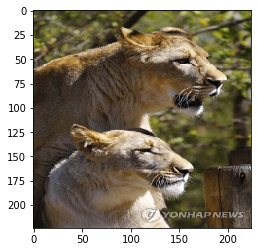

tf.Tensor(42, shape=(), dtype=int64)


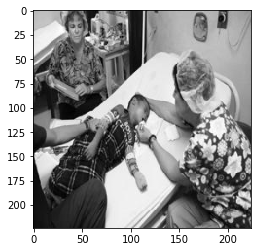

tf.Tensor(22, shape=(), dtype=int64)


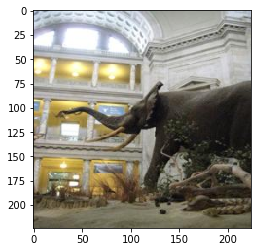

tf.Tensor(35, shape=(), dtype=int64)


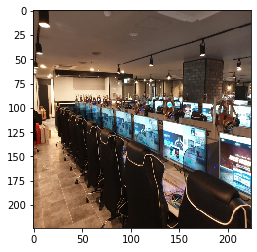

tf.Tensor(45, shape=(), dtype=int64)


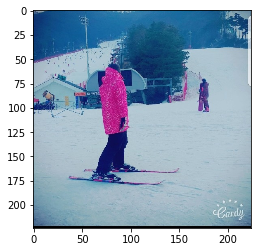

In [22]:
for data in parsed_trainset.take(5):
    print(data['label'])
    image_raw = tf.io.decode_raw(data['image'], tf.uint8)
    image_raw = tf.reshape(image_raw, [224, 224, 3])
    plt.imshow(image_raw)
    plt.show()

tf.Tensor(40, shape=(), dtype=int64)


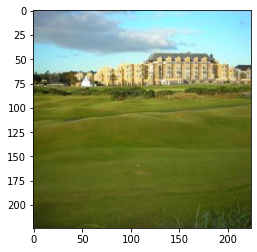

tf.Tensor(17, shape=(), dtype=int64)


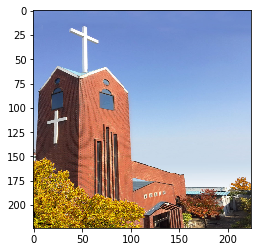

tf.Tensor(31, shape=(), dtype=int64)


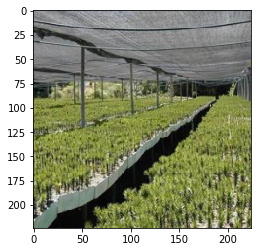

tf.Tensor(31, shape=(), dtype=int64)


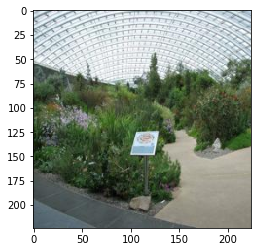

tf.Tensor(31, shape=(), dtype=int64)


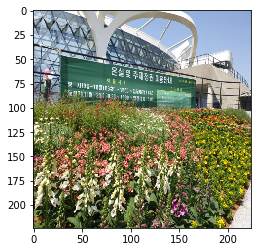

In [23]:
for data in parsed_validset.take(5):
    print(data['label'])
    image_raw = tf.io.decode_raw(data['image'], tf.uint8)
    image_raw = tf.reshape(image_raw, [224, 224, 3])
    plt.imshow(image_raw)
    plt.show()